# Imports

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")

import xgboost as xgb
from xgboost import plot_importance, plot_tree, plotting

import dtreeviz
import graphviz
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

import pandas as pd
import numpy as np


# Classifier model

In [3]:
random_state = 1234
dataset = pd.read_csv("../data/titanic/titanic.csv")
# Fill missing values for Age
dataset.fillna({"Age":dataset.Age.mean()}, inplace=True)
# Encode categorical variables
dataset["Sex_label"] = dataset.Sex.astype("category").cat.codes
dataset["Cabin_label"] = dataset.Cabin.astype("category").cat.codes
dataset["Embarked_label"] = dataset.Embarked.astype("category").cat.codes
features = ["Pclass", "Age", "Fare", "Sex_label", "Cabin_label", "Embarked_label"]
target = "Survived"

In [4]:
dtrain = xgb.DMatrix(dataset[features], dataset[target])

In [5]:
params = {"max_depth":3, "eta":0.05, "objective":"binary:logistic", "subsample":1}
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=8)

[18:11:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Initialize dtreeviz model


In [7]:
d = dataset[features + [target]]

In [12]:
xgb_shadow = ShadowXGBDTree(xgb_model, 1, d[features], d[target], features, target, class_names=[0, 1])

In [8]:
viz_model = dtreeviz.model(xgb_model, 
                            x_data=d[features], y_data=d[target], 
                            tree_index=1, feature_names=features, 
                            target_name=target, class_names=[0, 1])


## Tree visualizations

### Tree structure


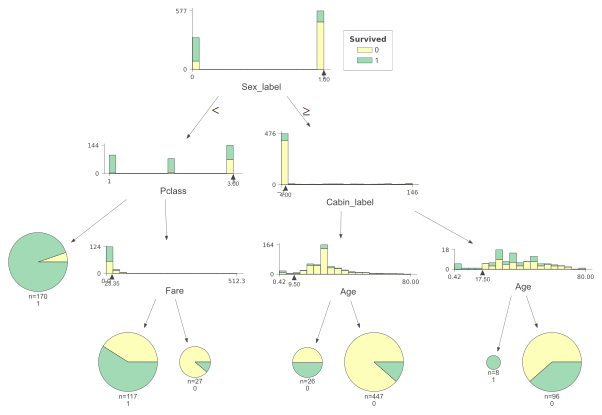

In [9]:
viz_model.view()

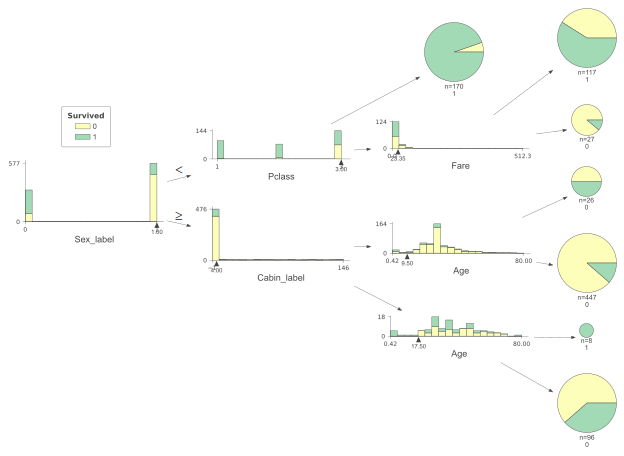

In [10]:
# different tree orientation
viz_model.view(orientation="LR")

### Tree structure simplified


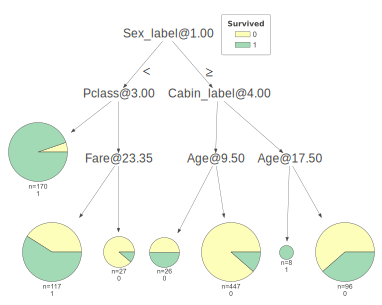

In [11]:
viz_model.view(fancy=False)

### Tree structure levels filtering


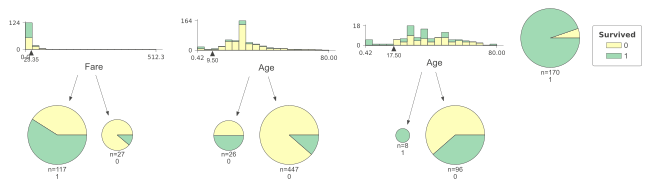

In [16]:
viz_model.view(depth_range_to_display=(2, 3))

## Prediction path explanations

In [17]:
x = dataset[features].iloc[10]
x

Pclass              3.0
Age                 4.0
Fare               16.7
Sex_label           0.0
Cabin_label       145.0
Embarked_label      2.0
Name: 10, dtype: float64

### Path inside tree structure

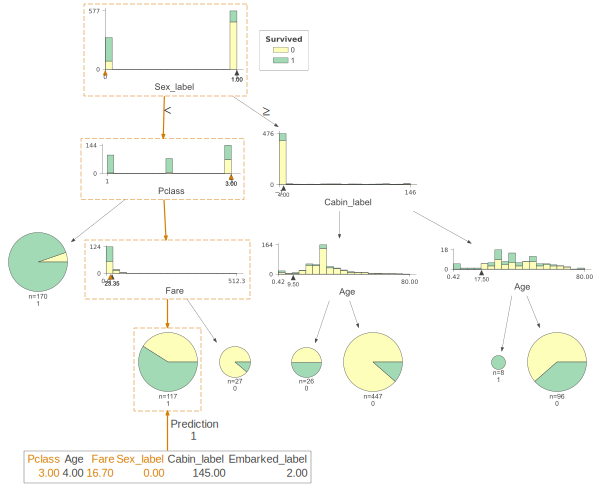

In [18]:
viz_model.view(x=x)

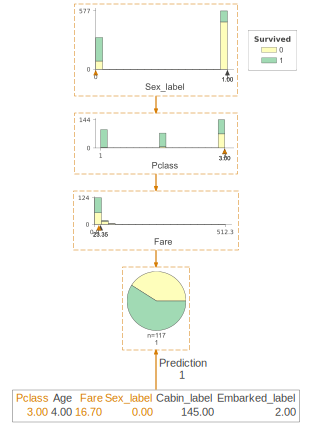

In [19]:
viz_model.view(x=x, show_just_path=True)

### Prediction features range values

In [20]:
print(viz_model.explain_prediction_path(x))

3.0 <= Pclass 
Fare < 23.35
Sex_label < 1.0



## Leaf info

### Leaf sizes

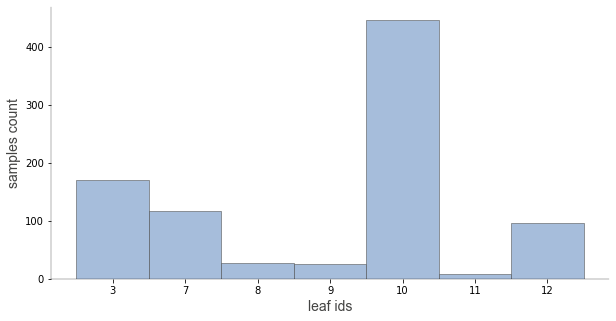

In [21]:
viz_model.leaf_sizes()

### Leaf classes distributions

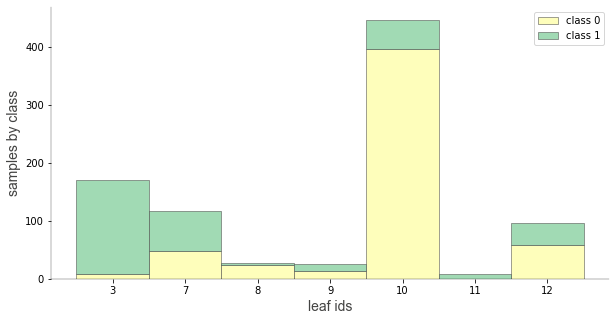

In [22]:
viz_model.ctree_leaf_distributions()

### Leaf/node stats


In [25]:
viz_model.node_stats(node_id=10)

Pclass         Age        Fare  Sex_label  Cabin_label  \
count  447.000000  447.000000  447.000000      447.0   447.000000   
mean     2.651007   30.389708   15.691562        1.0    -0.984340   
std      0.601860   10.331575   18.782897        0.0     0.216424   
min      1.000000   10.000000    0.000000        1.0    -1.000000   
25%      2.000000   24.000000    7.775000        1.0    -1.000000   
50%      3.000000   29.699118    8.050000        1.0    -1.000000   
75%      3.000000   33.000000   15.500000        1.0    -1.000000   
max      3.000000   74.000000  227.525000        1.0     3.000000   

       Embarked_label  
count      447.000000  
mean         1.644295  
std          0.712544  
min          0.000000  
25%          2.000000  
50%          2.000000  
75%          2.000000  
max          2.000000

# Regressor model

In [27]:
features_reg = ["Pclass", "Survived", "Fare", "Sex_label", "Cabin_label", "Embarked_label"]
target_reg = "Age"

In [28]:
dtrain_reg = xgb.DMatrix(dataset[features_reg], dataset[target_reg])
params_reg = {"max_depth":3, "eta":0.05, "objective":"reg:squarederror", "subsample":1}
xgb_model_reg = xgb.train(params=params_reg, dtrain=dtrain_reg, num_boost_round=8)

## Initialize dtreeviz model

In [31]:
viz_rmodel = dtreeviz.model(xgb_model_reg, x_data=dataset[features_reg], y_data=dataset[target_reg],
                           tree_index=1, feature_names=features_reg, target_name=target_reg)

## Tree visualisations

### Tree structure

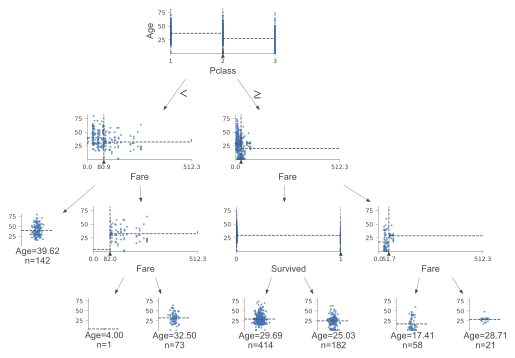

In [32]:
viz_rmodel.view()

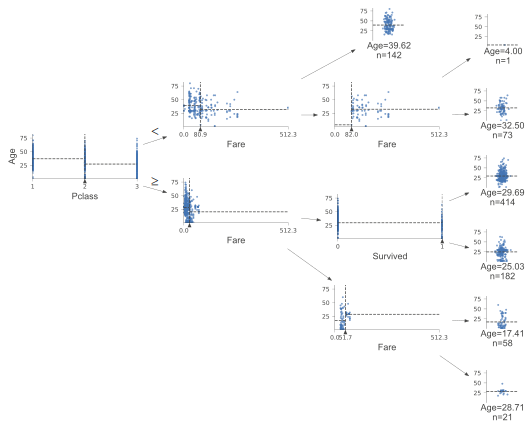

In [33]:
# different tree orientation
viz_rmodel.view(orientation="LR")

### Tree structure simplified

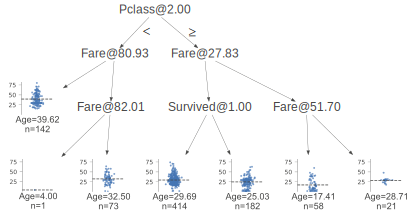

In [34]:
viz_rmodel.view(fancy=False)

### Tree structure levels filtering

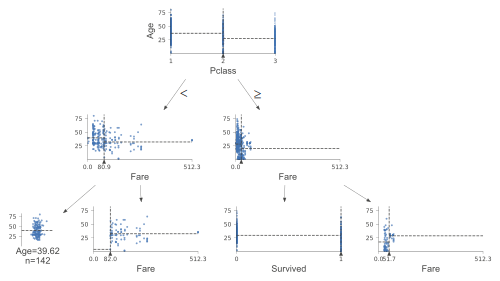

In [35]:
viz_rmodel.view(depth_range_to_display=(0, 2))

## Prediction path explanations

In [36]:
x = dataset[features_reg].iloc[10]
x

Pclass              3.0
Survived            1.0
Fare               16.7
Sex_label           0.0
Cabin_label       145.0
Embarked_label      2.0
Name: 10, dtype: float64

### Path inside tree structure

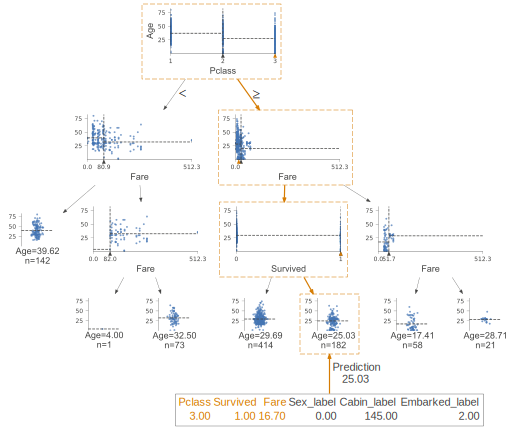

In [37]:
viz_rmodel.view(x = x)

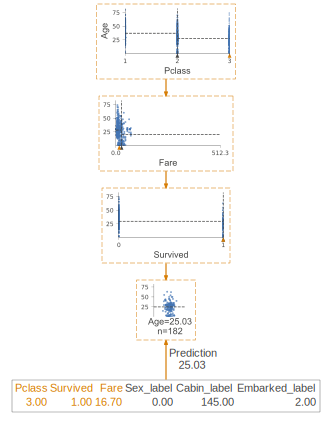

In [38]:
viz_rmodel.view(show_just_path=True, x = x)

### Prediction features range values

In [39]:
print(viz_rmodel.explain_prediction_path(x))

2.0 <= Pclass 
1.0 <= Survived 
Fare < 27.83



## Leaf info

### Leaf sizes

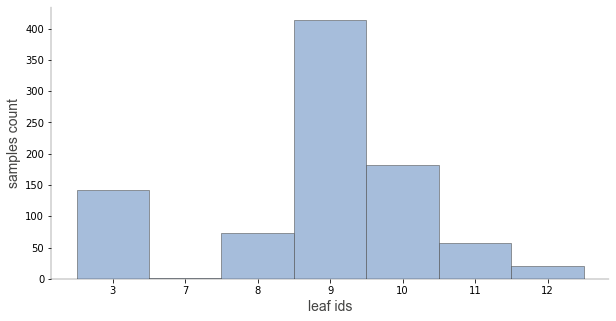

In [40]:
viz_rmodel.leaf_sizes()

### Leaf distributions

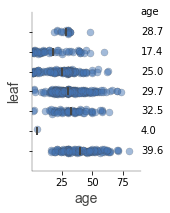

In [44]:
viz_rmodel.rtree_leaf_distributions()

### Leaf/node stats

In [45]:
viz_rmodel.node_stats(node_id=9)

Pclass  Survived        Fare   Sex_label  Cabin_label  \
count  414.000000     414.0  414.000000  414.000000   414.000000   
mean     2.792271       0.0   11.021476    0.855072     1.966184   
std      0.406173       0.0    5.698663    0.352454    20.066568   
min      2.000000       0.0    0.000000    0.000000    -1.000000   
25%      3.000000       0.0    7.750000    1.000000    -1.000000   
50%      3.000000       0.0    8.050000    1.000000    -1.000000   
75%      3.000000       0.0   13.000000    1.000000    -1.000000   
max      3.000000       0.0   27.750000    1.000000   145.000000   

       Embarked_label  
count      414.000000  
mean         1.678744  
std          0.664333  
min          0.000000  
25%          2.000000  
50%          2.000000  
75%          2.000000  
max          2.000000

### rtreeviz_univar

In progress...

In [39]:
# features_reg_univar = ["Pclass"]
# target_reg_univar = "Age"

# dtrain_reg_univar = xgb.DMatrix(dataset[features_reg_univar], dataset[target_reg_univar])
# params_reg_univar = {"max_depth":3, "eta":0.05, "objective":"reg:squarederror", "subsample":1}
# xgb_model_reg_univar = xgb.train(params=params_reg_univar, dtrain=dtrain_reg_univar, num_boost_round=8)

# xgb_shadow_reg_univar = ShadowXGBDTree(xgb_model_reg_univar, 1, dataset[features_reg_univar], dataset[target_reg_univar], features_reg_univar, target_reg_univar)
# trees.rtreeviz_univar(xgb_shadow_reg_univar, dataset[features_reg_univar], dataset[target_reg_univar], features_reg_univar, target_reg_univar)